In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Rohan\AppData\Local\Temp\ipykernel_5652\2641534478.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
csew=pd.read_csv('https://raw.githubusercontent.com/rohanspage/cmtDataScience/master/.venv/2.%20Crime%20survey%20for%20England%20Wales%202017-18.csv')
csew.head()

,rowlabel,nadults,sex,age,yrsarea,cartot,quallife,walkdark,unoccl,pubeve,...,agegrp7,ethgrp2a,illONS,educat3,remploya,h10sec6a,club3,ratpol3,emdiqu15x,confx
0,174295080,4,1,20,7,3,1,1,4,3,...,1,1,1,3,1,8,2,0,1,-0.897618
1,175024240,3,1,20,7,4,1,1,3,3,...,1,1,1,3,1,1,2,100,2,-0.184391
2,175044240,4,1,20,7,1,2,2,5,2,...,1,1,1,4,1,4,1,100,4,0.222734
3,175516240,2,2,20,7,2,5,3,3,3,...,1,1,1,3,1,1,2,100,1,-0.208943
4,175640240,2,1,20,7,1,1,2,2,1,...,1,1,3,4,3,3,1,100,2,1.665470


- Differences in perceptions of crime by age
- Differences in perceptions of crime by sex

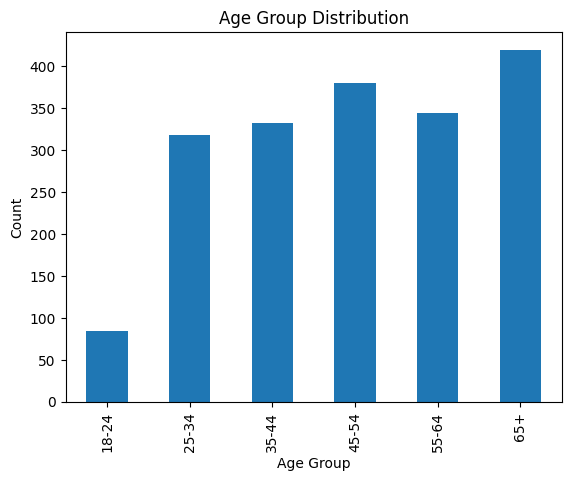

In [3]:
age_groups = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
csew['agegrp7'] = pd.cut(csew['age'], bins=[18, 24, 34, 44, 54, 64, 100], labels=age_groups)
csew['agegrp7'].value_counts().sort_index().plot(kind='bar') #plotting the age group
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show() #showing the plot

C:\Users\Rohan\AppData\Local\Temp\ipykernel_3284\442089758.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  csew['sex'].replace({'1': 'male', '2': 'female'}, inplace=True)


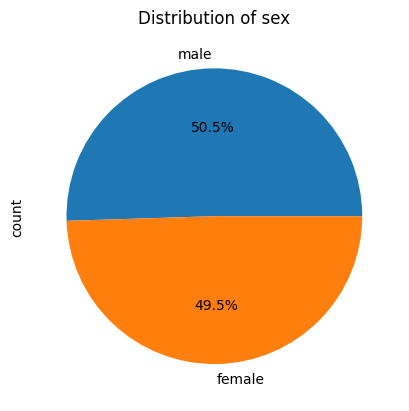

In [6]:
csew['sex'].replace({'1': 'male', '2': 'female'}, inplace=True)
csew['sex'].value_counts().plot(kind='pie', labels=['male', 'female'], autopct='%1.1f%%')
plt.title('Distribution of sex')
plt.show() #showing the pie chart

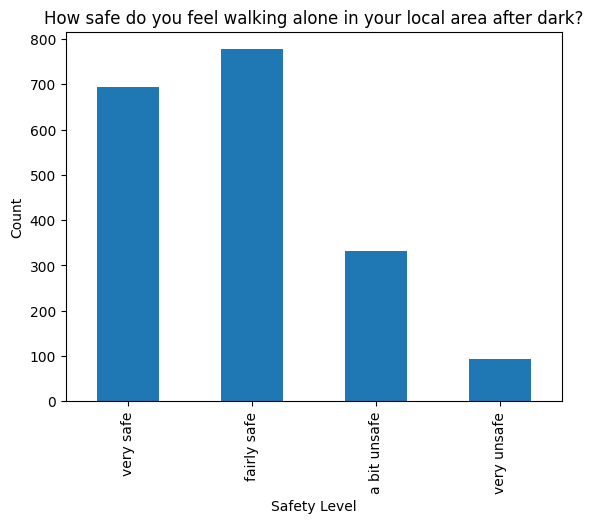

In [14]:
csew['walkdark'].value_counts().sort_index().plot(kind='bar')
plt.title('How safe do you feel walking alone in your local area after dark?')
plt.xlabel('Safety Level')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['very safe', 'fairly safe', 'a bit unsafe', 'very unsafe'])
plt.show() #showing the bar chart

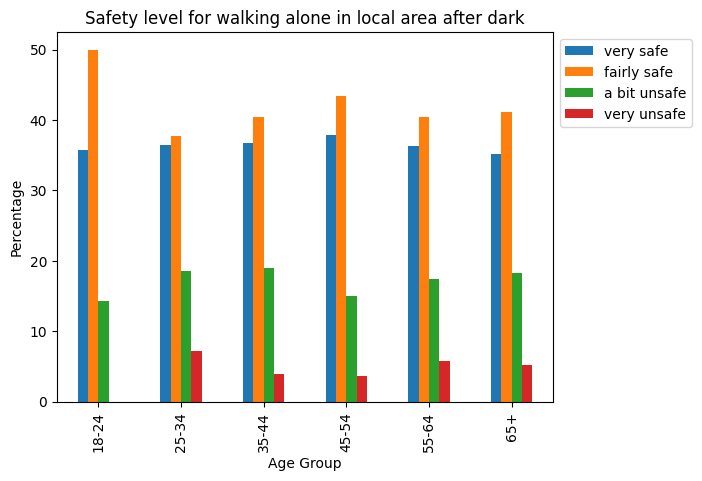

In [18]:
age_group_proportions.plot(kind='bar')
plt.title('Safety level for walking alone in local area after dark')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=age_groups)
plt.legend(['very safe', 'fairly safe', 'a bit unsafe', 'very unsafe'], bbox_to_anchor=(1, 1))
plt.show() #showing the bar chart

C:\Users\Rohan\AppData\Local\Temp\ipykernel_3284\1354639797.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_proportions = csew.groupby('agegrp7')['walkdark'].value_counts(normalize=True).unstack().sort_index()


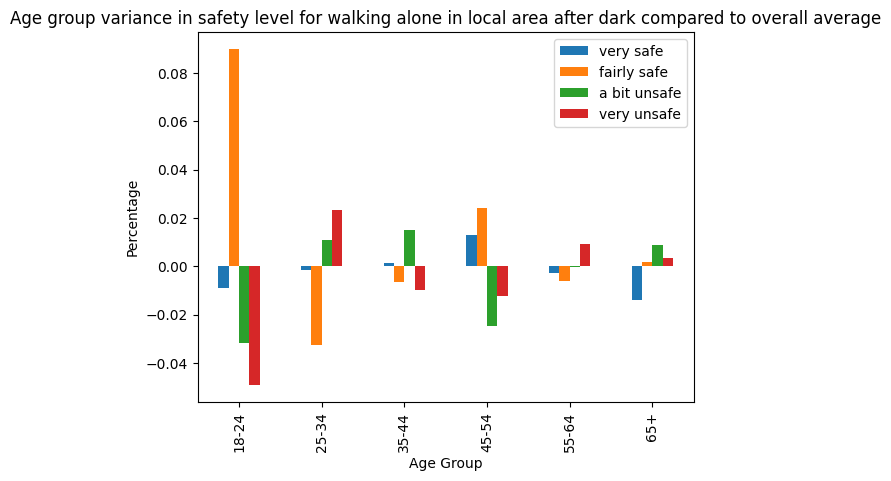

In [21]:
# chart illustrating the variance of the safety level for walking alone in local area after dark for different age groups compared to the overall average
age_group_proportions = csew.groupby('agegrp7')['walkdark'].value_counts(normalize=True).unstack().sort_index()
age_group_proportions = age_group_proportions.subtract(csew['walkdark'].value_counts(normalize=True), axis=1).dropna(axis=1)
age_group_proportions.plot(kind='bar')
plt.title('Age group variance in safety level for walking alone in local area after dark compared to overall average')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=age_groups)
plt.legend(['very safe', 'fairly safe', 'a bit unsafe', 'very unsafe'], bbox_to_anchor=(1, 1))
plt.show() #showing the bar chart


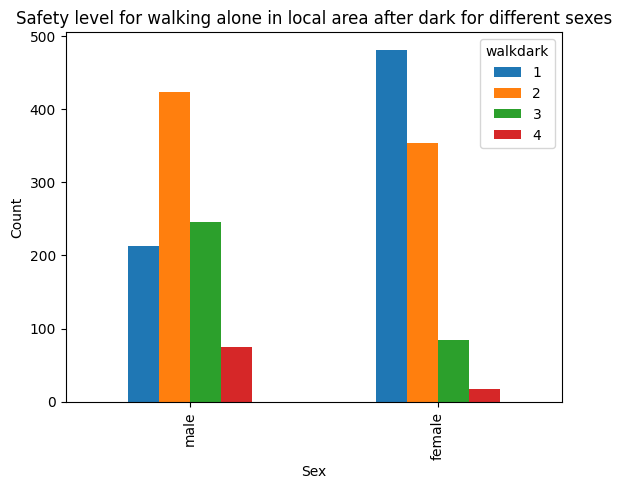

In [26]:
csew['sex'].replace({1: 'male', 2: 'female'}, inplace=True)
csew.groupby('sex')['walkdark'].value_counts().unstack().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Safety level for walking alone in local area after dark for different sexes')
plt.xticks([0, 1], ['male', 'female'])
plt.show() #showing the bar chart

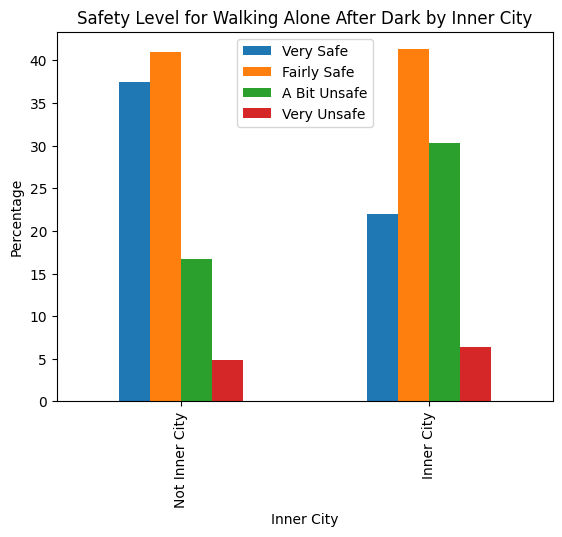

In [7]:
inner_city_safety = pd.crosstab(csew['inner'], csew['walkdark'], normalize='index') * 100
inner_city_safety.plot(kind='bar', stacked=False)
plt.xlabel('Inner City')
plt.ylabel('Percentage')
plt.title('Safety Level for Walking Alone After Dark by Inner City')
plt.xticks([0, 1], ['Not Inner City', 'Inner City'])
plt.legend(['Very Safe', 'Fairly Safe', 'A Bit Unsafe', 'Very Unsafe'])
plt.show() #showing the bar chart


In [9]:
correlation = csew['inner'].corr(csew['walkdark'], method='pearson')
print('Pearson correlation between inner and walkdark:', correlation)


Pearson correlation between inner and walkdark: 0.0881103721175729


In [5]:
%pip install scipy

from scipy.stats import spearmanr

correlation, p_value = spearmanr(csew['inner'], csew['walkdark'])
print('Spearman\'s rank correlation coefficient:', correlation)
print('p-value:', p_value)


  Using cached scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.12.0-cp311-cp311-win_amd64.whl (46.2 MB)
Note: you may need to restart the kernel to use updated packages.
Spearman's rank correlation coefficient: 0.09163657505955727
p-value: 6.473197954169813e-05
